Liat hallal - 322925819
Avishem asayag - 318530268
Elyashv Nizri - 209203900
Naama Omeysi - 314711599

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import statsmodels.api as sm
import pickle as pkl
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle
from statsmodels.formula.api import poisson
import statsmodels.formula.api as smf 
from scipy.stats import chi2
from mpl_toolkits.mplot3d import Axes3D

<h1 style="background-color: #CEECF5; color: #605E5E; border-radius: 20px; text-align: center; padding-top: 20px; padding-bottom: 20px; font-family: 'Alef'" id="introduction">חלק 1</h1>

# סעיף 1

In [2]:
file_path = 'project_part_1_group_5.pkl'
with open(file_path, 'rb') as file:
    data = pickle.load(file)
data

,Intercept,temp,rigid_left__c,is_mathane
0,1.0,37.425170,False,True
1,1.0,31.170425,True,False
2,1.0,18.867172,True,True
3,1.0,39.748187,False,True
4,1.0,22.837579,False,True
...,...,...,...,...
115,1.0,18.057162,False,True
116,1.0,34.685234,True,False
117,1.0,32.609464,True,False
118,1.0,22.763482,False,True


In [3]:
data['chimical_binary'] = data['is_mathane'].apply(lambda x: 1 if x==True else 0)
data['rigid_binary'] = data['rigid_left__c'].apply(lambda x: 1 if x==True else 0)
data1= data

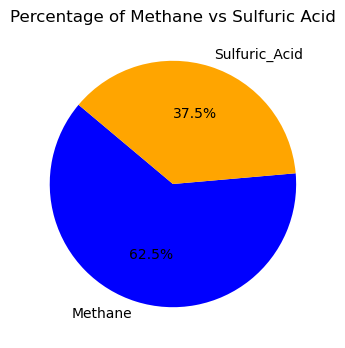

In [4]:
methane_count = data1['chimical_binary'].sum()
other_count = len(data1) - methane_count

total_count = len(data1)
methane_percentage = (methane_count / total_count) * 100
other_percentage = (other_count / total_count) * 100

fig, ax = plt.subplots(figsize=(4,4))
ax.pie([methane_percentage, other_percentage], labels=['Methane', 'Sulfuric_Acid'], colors=['blue', 'orange'], autopct='%1.1f%%', startangle=140)

ax.set_title('Percentage of Methane vs Sulfuric Acid')

plt.show()


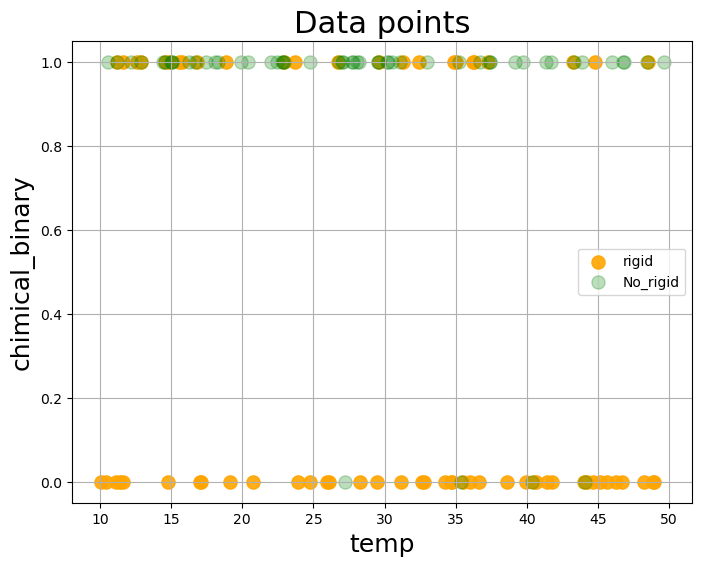

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(data1.loc[data1['rigid_binary']==1, 'temp'], data1.loc[data1['rigid_binary']==1, 'chimical_binary'], label =  'rigid', color = 'orange', s= 90, alpha = 0.9)
plt.scatter(data1.loc[data1['rigid_binary']==0, 'temp'], data1.loc[data1['rigid_binary']==0, 'chimical_binary'], label =  'No_rigid', color = 'green', s= 90, alpha = 0.26)
plt.xlabel('temp', fontsize = 18)
plt.ylabel('chimical_binary',  fontsize = 18)
plt.grid()
plt.title('Data points',  fontsize = 22)
plt.legend()
plt.show()

<div dir="rtl">
    
###   נראה מגרף זה שכאשר יש גושים זה יהיה החומר מסוג Sulfuric Acid(0), ואילו כאשר אין גושים יש יותר סיכוי שזה יהיה החומר מסוג mathane(1,אבל בצורה פחות גורפת)

In [6]:
model_logistic1 = sm.Logit(data1['chimical_binary'], data1[['Intercept','rigid_binary', 'temp']])
result_logistic1 = model_logistic1.fit()
print(result_logistic1.summary())

Optimization terminated successfully.
         Current function value: 0.452796
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        chimical_binary   No. Observations:                  120
Model:                          Logit   Df Residuals:                      117
Method:                           MLE   Df Model:                            2
Date:                Tue, 13 Aug 2024   Pseudo R-squ.:                  0.3156
Time:                        23:30:49   Log-Likelihood:                -54.336
converged:                       True   LL-Null:                       -79.388
Covariance Type:            nonrobust   LLR p-value:                 1.318e-11
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.9913      0.855      4.667      0.000       2.315       5.668
rigid_binary    -3.1727

$$ p = \frac{1}{1+e^{-(b_0 +b_1*rigid binary +b_2*temp)}} $$    
$$ p = \frac{1}{1+e^{-(3.9913 -3.1727*rigid binary-0.0466*temp)}} $$    

# סעיף 2 

In [7]:
data1['prob_preds'] = result_logistic1.predict(data1[['Intercept', 'rigid_binary', 'temp']])
data1.head(10)

,Intercept,temp,rigid_left__c,is_mathane,chimical_binary,rigid_binary,prob_preds
0,1.0,37.425170,False,True,1,0,0.904313
1,1.0,31.170425,True,False,0,1,0.346388
2,1.0,18.867172,True,True,1,1,0.484694
3,1.0,39.748187,False,True,1,0,0.894521
4,1.0,22.837579,False,True,1,0,0.949133
5,1.0,45.982637,False,True,1,0,0.863781
6,1.0,26.127531,True,False,0,1,0.401360
7,1.0,44.038839,True,False,0,1,0.225303
8,1.0,27.749617,False,True,1,0,0.936866
9,1.0,41.680566,False,True,1,0,0.885711


In [8]:
thresholds = np.arange(0.0, 1.0, 0.01)
valid_thresholds = []

for threshold in thresholds:
    data1['classification'] = data1['prob_preds'].apply(lambda x: 1 if x > threshold else 0)
    
    TP = data1.loc[(data1['chimical_binary'] == 1) & (data1['classification'] == 1), :].shape[0]
    FP = data1.loc[(data1['chimical_binary'] == 0) & (data1['classification'] == 1), :].shape[0]
    TN = data1.loc[(data1['chimical_binary'] == 0) & (data1['classification'] == 0), :].shape[0]
    FN = data1.loc[(data1['chimical_binary'] == 1) & (data1['classification'] == 0), :].shape[0]

    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)

    if sensitivity > 0.6 and specificity > 0.6:
        valid_thresholds.append(threshold)

# מציאת התווך
if valid_thresholds:
    min_threshold = min(valid_thresholds)
    max_threshold = max(valid_thresholds)
    print(f'The valid threshold range is from {min_threshold:.2f} to {max_threshold:.2f}')
else:
    print("No valid thresholds found where both Accuracy and Specificity are above 0.6")

The valid threshold range is from 0.41 to 0.87


<div dir="rtl">
    
###  טווח ערכי הסף שמקיימים את התנאי הוא בין 0.41 לבין 0.87

# סעיף 3

In [9]:
thresholds = np.arange(0.0, 1.0, 0.01)
max_accuracy = 0
best_threshold = 0

for threshold in thresholds:
    data1['classification'] = data1['prob_preds'].apply(lambda x: 1 if x > threshold else 0)
    
    TP = data1.loc[(data1['chimical_binary'] == 1) & (data1['classification'] == 1), :].shape[0]
    FP = data1.loc[(data1['chimical_binary'] == 0) & (data1['classification'] == 1), :].shape[0]
    TN = data1.loc[(data1['chimical_binary'] == 0) & (data1['classification'] == 0), :].shape[0]
    FN = data1.loc[(data1['chimical_binary'] == 1) & (data1['classification'] == 0), :].shape[0]

    accuracy = (TP + TN) / (TP + FP + TN + FN)

    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_threshold = threshold

print(f'The maximum Accuracy of {max_accuracy:.2f} is achieved at a threshold of {best_threshold:.2f}')

The maximum Accuracy of 0.78 is achieved at a threshold of 0.51


<div dir="rtl">
    
### הדיוק המרבי הוא 0.78 , מושג בסף של 0.51


3.א

נציב במשוואה:

$$ p = \frac{1}{1+e^{-(3.9913 -3.1727*1-0.0466*25.5)}}= 0.4086 $$    

3.ב

נציב במשוואה:

$$ p = \frac{1}{1+e^{-(3.9913 -3.1727*1-0.0466*26.5)}}= 0.3975 $$  

3.ג

נציב במשוואה:

$$ p = \frac{1}{1+e^{-(3.9913 -3.1727*1-0.0466*27.5)}}= 0.3865 $$  

# סעיף 4



log odd ratio בין ב לבין א:

$$Log\left(\frac{\frac{0.3975}{1-0.3975}}{\frac{0.4086}{1-0.4086}}\right)= -0.0461$$

log odd ratio בין ג לבין ב:

$$Log\left(\frac{\frac{0.3865}{1-0.3865}}{\frac{0.3975}{1-0.3975}}\right)= -0.0461$$

log odd ratio בין ג לבין א:

$$Log\left(\frac{\frac{0.3865}{1-0.3865}}{\frac{0.4086}{1-0.4086}}\right)= -0.0922$$

<div dir="rtl">

   
   ### ערכים בין הקבוצות

#### הערכים בין ב' לא' ובין ג' לב' הם שווים 

#### 0.0461−

#### לעומת זאת, הערך בין ג' לא' הוא שונה 

#### 0.0922-

### השפעת טמפרטורה על ההסתברות שהחומר הוא Methane

####    הערכים בין ב' לא' ובין ג' לב' שווים ומצביעים על השפעה קטנה מאוד של שינוי הטמפרטורה על ההסתברות שהחומר הוא methane

#### הערך בין ג' לא' שונה ומצביע על ירידה גדולה יותר בהסתברות כאשר הטמפרטורה משתנה מ 25.5 ל-27.5

<h1 style="background-color: #CEECF5; color: #605E5E; border-radius: 20px; text-align: center; padding-top: 20px; padding-bottom: 20px; font-family: 'Alef'" id="introduction">חלק 2</h1>

# סעיף 1


In [10]:
file_path = 'project_part_2_group_5.pkl'
with open(file_path, 'rb') as file:
    data2 = pickle.load(file)
data2

,Intercept,age,safety_guidence_score,factory__c,chemical__c,time_in_factory,num_accidents
0,1.0,45,4,Montreal,Methane,2,0
1,1.0,42,3,Saskatoon,Methane,5,3
2,1.0,27,6,Vancouver,Methane,3,3
3,1.0,31,4,Vancouver,Methane,9,9
4,1.0,23,5,Toronto,Methane,2,4
...,...,...,...,...,...,...,...
9995,1.0,42,1,Saskatoon,Methane,4,4
9996,1.0,24,3,Vancouver,Methane,7,7
9997,1.0,42,2,Calgery,Methane,4,4
9998,1.0,49,4,Montreal,Methane,9,5


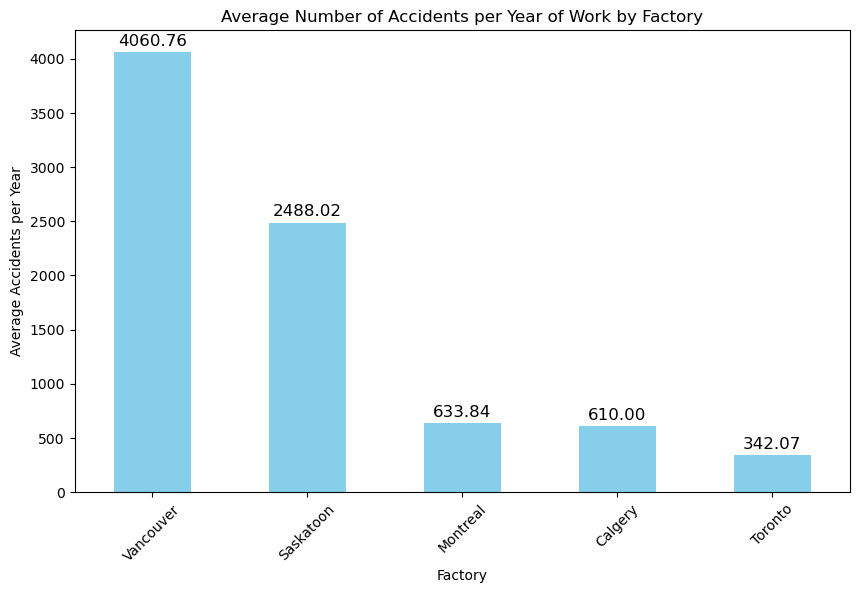

In [11]:
data2['accidents_per_year'] = data2['num_accidents'] / data2['time_in_factory']
avg_accidents_per_factory = data2.groupby('factory__c')['accidents_per_year'].sum()

avg_accidents_per_factory = avg_accidents_per_factory.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = avg_accidents_per_factory.plot(kind='bar', color='skyblue')

for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.2f'),
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='center',
                  size=12, xytext=(0, 8),
                  textcoords='offset points')

plt.title('Average Number of Accidents per Year of Work by Factory')
plt.xlabel('Factory')
plt.ylabel('Average Accidents per Year')
plt.xticks(rotation=45)
plt.show()

<div dir="rtl">
    
### ניתן לראות הבדלים ברורים במספר התאונות בין מפעל למפעל,ניתן להבין מכך שיש משמעות גדולה לסוג המפעל ולכן צריך לשלב את המשתנה  factory__c במודל . 



# סעיף 2

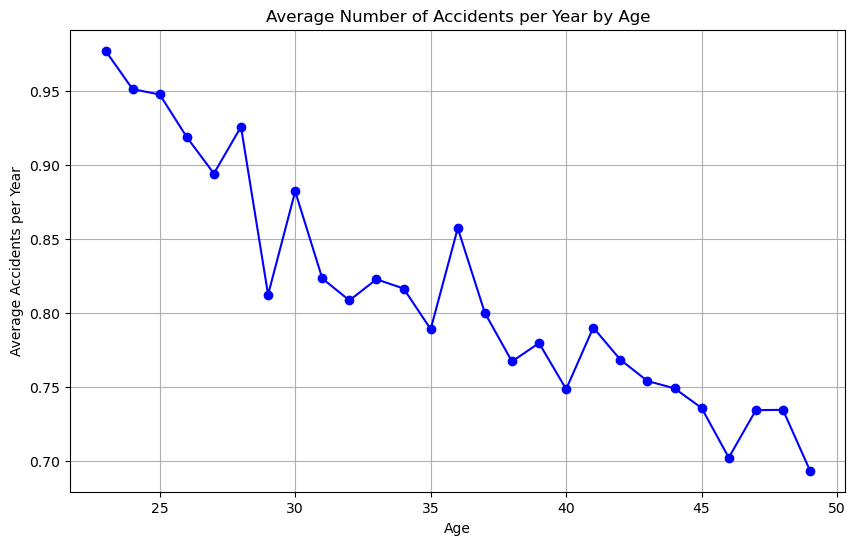

In [12]:
avg_accidents_per_age = data2.groupby('age')['accidents_per_year'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_accidents_per_age.index, avg_accidents_per_age.values, marker='o', color='blue', linestyle='-')
plt.title('Average Number of Accidents per Year by Age')
plt.xlabel('Age')
plt.ylabel('Average Accidents per Year')
plt.grid(True)
plt.show()

<div dir="rtl">

### ניתן לראות בבירור שיש קשר שלילי חזק בין גיל העובד למספר אירועי בטיחות בממוצע בשנה.

### סימן המקדם של הגיל במשוואה יהיה שלילי.


# סעיף 3


In [13]:
data2['chemical_c_BIN'] = data2['chemical__c'].apply(lambda x: 0 if x == 'Sulfuric_Acid' else 1)
data2['Calgery'] = data2['factory__c'].apply(lambda x: 1 if x == 'Calgery' else 0)
data2['Montreal'] = data2['factory__c'].apply(lambda x:1 if x == 'Montreal' else 0)
data2['Saskatoon'] = data2['factory__c'].apply(lambda x: 1 if x == 'Saskatoon' else 0)
data2['Toronto'] = data2['factory__c'].apply(lambda x: 1 if x == 'Toronto' else 0)
data2['Vancouver'] = data2['factory__c'].apply(lambda x: 1 if x == 'Vancouver' else 0)

data2.head()

,Intercept,age,safety_guidence_score,factory__c,chemical__c,time_in_factory,num_accidents,accidents_per_year,chemical_c_BIN,Calgery,Montreal,Saskatoon,Toronto,Vancouver
0,1.0,45,4,Montreal,Methane,2,0,0.0,1,0,1,0,0,0
1,1.0,42,3,Saskatoon,Methane,5,3,0.6,1,0,0,1,0,0
2,1.0,27,6,Vancouver,Methane,3,3,1.0,1,0,0,0,0,1
3,1.0,31,4,Vancouver,Methane,9,9,1.0,1,0,0,0,0,1
4,1.0,23,5,Toronto,Methane,2,4,2.0,1,0,0,0,1,0


In [14]:
data2['factory__c'] = data2['factory__c'].astype('category')
data2['chemical__c'] = data2['chemical__c'].astype('category')

data2['factory__c'] = data2['factory__c'].cat.reorder_categories(['Toronto', 'Calgery', 'Montreal', 'Saskatoon', 'Vancouver'], ordered=True)
data2['chemical__c'] = data2['chemical__c'].cat.reorder_categories(['Methane', 'Sulfuric_Acid'], ordered=True)

formula = 'num_accidents ~ age + safety_guidence_score + time_in_factory + C(factory__c) + C(chemical__c)'

poisson_model = smf.poisson(formula=formula, data=data2).fit()

print(poisson_model.summary())

equation = f"log(λ) = {poisson_model.params['Intercept']:.4f}"
for feature in poisson_model.params.index[1:]:
    equation += f" + ({poisson_model.params[feature]:.4f} * {feature})"

print("\nFinal Equation:")
print(equation)

Optimization terminated successfully.
         Current function value: 2.068440
         Iterations 6
                          Poisson Regression Results                          
Dep. Variable:          num_accidents   No. Observations:                10000
Model:                        Poisson   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Tue, 13 Aug 2024   Pseudo R-squ.:                  0.2497
Time:                        23:31:11   Log-Likelihood:                -20684.
converged:                       True   LL-Null:                       -27567.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           0.5011      0.035     14.386  

In [15]:
model_poisson2 = sm.GLM(data2['num_accidents'],data2[['Intercept', 'age','safety_guidence_score','time_in_factory','Vancouver' ]] , family=sm.families.Poisson())  # Poisson regression model
results_poisson2 = model_poisson2.fit()
print(results_poisson2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          num_accidents   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9995
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20686.
Date:                Tue, 13 Aug 2024   Deviance:                       11742.
Time:                        23:31:11   Pearson chi2:                 1.07e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.7475
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.50

## :משוואת הרגרסיה הפואסונית


## $$  \quad  E[Y_i] = \lambda_i = e^{ 0.5055 -0.0111*(age) + 0.0077 * (safety_guidence_score)+0.1842 * (time_in_factory) + 0.4267 * (Vancouver)} $$


# סעיף 4

### דרך 1

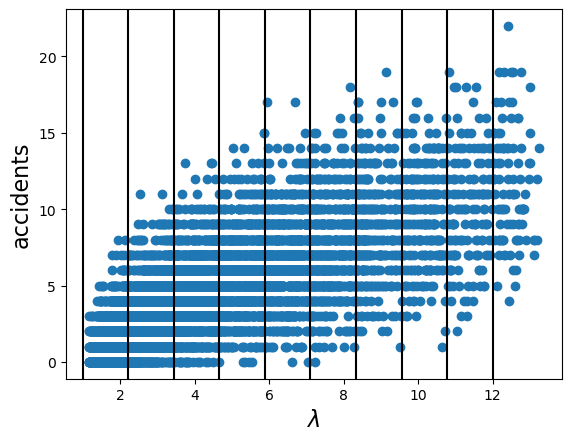

In [16]:
data2['rates'] = results_poisson2.fittedvalues
plt.figure()
plt.scatter(data2['rates'], data2['num_accidents'])
plt.xlabel('$\lambda$', fontsize=16)
plt.ylabel('accidents', fontsize = 16)
for x_val in np.linspace(1,12, 10):
    plt.axvline(x=x_val, color= 'black')
plt.show()

In [17]:
data2.loc[(data2['rates']>5)&(data2['rates']<10), 'num_accidents'].mean()

6.757866843325605

In [18]:
data2.loc[(data2['rates']>5)&(data2['rates']<10), 'num_accidents'].std()**2

8.288933287763811

In [19]:
print(data2['rates'].min(), data2['rates'].max())


1.1565877167414775 13.257271085594429


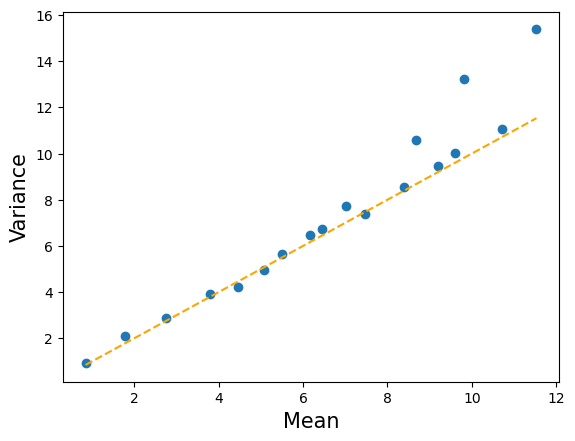

In [20]:
lams = np.linspace(1, 13.5, 20)

means = []
vars_ = []

for lams_ind in range(lams.shape[0]-1):
    
    lb = lams[lams_ind]
    ub = lams[lams_ind+1]
        
    shape = data2.loc[(data2['rates']>lb)& (data2['rates']<ub), 'num_accidents'].shape
    var = data2.loc[(data2['rates']>lb)& (data2['rates']<ub), 'num_accidents'].std()**2
    mean = data2.loc[(data2['rates']>lb)& (data2['rates']<ub), 'num_accidents'].mean()
    
    if shape[0] > 20:
        means.append(mean)
        vars_.append(var)
    
plt.figure()
plt.scatter(means, vars_)
plt.plot(means, means, '--', label='y = x', color = 'orange')
plt.xlabel('Mean', fontsize = 15)
plt.ylabel('Variance', fontsize = 15)
plt.show()

<div dir="rtl">

### ניתן לראות ע"פ הגרף כי רוב הנקודות נמצאות על הקו הליניארי שמציג שהתוחלת שווה לשונות ולכן ניתן לומר כי רגרסיה פואסונית מתאימה


### דרך 2

#### 𝐻0:
  השגיאות מתפלגות פואסונית

#### 𝐻1:
  השגיאות לא מתפלגות פואסונית


In [21]:
results_poisson2.pearson_chi2

10694.190818276977

In [22]:
results_poisson2.df_resid

9995

In [23]:
R = results_poisson2.pearson_chi2 / results_poisson2.df_resid
print(R)

1.0699540588571261


In [24]:
df1 = results_poisson2.df_resid
p_value = 1 - chi2.cdf(results_poisson2.pearson_chi2, df1)
print("Pearson Chi-Square Test p-value:", p_value)

Pearson Chi-Square Test p-value: 6.520600519532849e-07


<div dir="rtl">
    
### ניתן לראות כי ערך p-value קטן מאוד מ 1 ולכן רגרסיה פואסונית לא מתאימה, כלומר נדחה את השערת האפס- השגיאות לא מתפלגות פואסונית


### דרך 3

In [25]:
R = results_poisson2.pearson_chi2 / results_poisson2.df_resid
print(R) 

1.0699540588571261


In [26]:
overdispersion_parameter = results_poisson2.pearson_chi2 / results_poisson2.df_resid
print(f"Overdispersion parameter: {overdispersion_parameter:.2f}")


Overdispersion parameter: 1.07


<div dir="rtl">
    
###  מדד המראה לנו את היחס בין התוחלת לשונות - כאשר נרצה שיהיה כמה שיותר קרוב ל-1 ולכן רגרסיה פואסונית מתאימה

      
 

### דרך 4

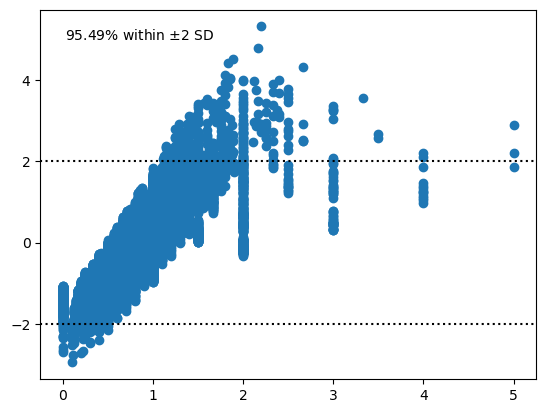

In [27]:
import matplotlib.pyplot as plt
num_within_2sd = ((results_poisson2.resid_pearson >= -2) & (results_poisson2.resid_pearson <= 2)).sum()
total_points = len(results_poisson2.resid_pearson)
percentage_within_2sd = (num_within_2sd / total_points) * 100

plt.figure()
plt.scatter(data2['accidents_per_year'], results_poisson2.resid_pearson)
plt.axhline(y=-2, linestyle=':', color='black', label='$\pm 2$')
plt.axhline(y=+2, linestyle=':', color='black')

plt.text(0.05, 0.95, f'{percentage_within_2sd:.2f}% within $\pm$2 SD',
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.show()

<div dir="rtl">

### ניתן לראות כי 95.49% מהשגיאות נמצאות +- 2 סטיות תקן ולכן רגרסיה פואסונית מתאימה

<div dir="rtl">


###    לפי ארבעת הדרכים מצאנו כי 3 מתוך ה4 מתאימות לרגרסיה פואסונית ולכן נשתמש ברגרסיה זו   .



# סעיף 5

<div dir="rtl">

### הבדיקה הזו עוזרת להעריך את התקינות של הנחות המודל על ידי בחינת התפלגות השגיאות  של המודל. ההנחה היא שהשגיאות צריכות להיות מפולגות באופן נורמלי סביב אפס, עם ממוצע אפס וסטיית תקן קבועה. אם כ-95% מהשגיאות נופלות בתוך טווח של ±2 סטיות תקן, זה מעיד על כך שהשגיאות אכן מתפלגות בצורה נורמלית ומתאימות להנחות הבסיסיות של המודל.
    
### הסיבה לכך שהבדיקה חשובה: אם השגיאות של המודל עומדות בדרישה הזו, זהו מדד טוב לכך שהמודל מתאים.
### הנחות במודל רגרסיה פואסונית:
### התפלגות פואסונית של התוצאה:

### מניחים שהמשתנה התלוי נמדד כספירה של אירועים (כמו מספר תאונות, ביקורים בבית חולים וכו') ומפולג לפי התפלגות פואסונית. כלומר, ההסתברות למספר מסוים של אירועים תלויה בפרמטר λ, שהוא שיעור ההיארעות הממוצע של האירועים.
### תלות לינארית ב-log של שיעור ההיארעות:
### מניחים שקיים קשר לינארי בין log של שיעור ההיארעות (log(λ)) לבין המשתנים המסבירים (הבלתי תלויים). כלומר, ההשפעה של כל משתנה בלתי תלוי על λ היא אקספוננציאלית, והקשר הוא של log-linear.
### אי תלות השגיאות:
### מניחים שהשגיאות  במודל אינן תלויות זו בזו, כלומר אין קורלציה בין השגיאות השונות.
### שיעור היארעות קבוע:
### מניחים שהשיעור הממוצע של ההיארעות (λ) הוא קבוע לתקופה הנמדדת, ושאין שונות יתר (overdispersion) במודל. במקרה של שונות יתר, ייתכן שהמודל הפואסוני אינו מתאים.



# סעיף 6

<div dir="rtl">

### בבדיקת ההנחה שהתוחלת שווה לשונות במודל פואסוני, מחלקים את הנתונים ל-buckets כדי לבדוק אם ההנחה מתקיימת בכל קבוצה בנפרד. 
###   הסיבה היא שכאשר מסתכלים על כל ה dataset כיחידה אחת, אפשר לפספס שונות משמעותית בין קבוצות שונות, כמו שונות יתר או שונות חסר, שמודל פואסוני רגיש להן. 
###   בדיקה בתוך כל bucket מאפשרת לזהות בעיות אלו ולהבטיח שהמודל מתאים לכל תת-קבוצה ולא רק לכלל הנתונים.

# סעיף 7

#### בחרנו לבדוק לפי המשתנה הרציף של הגיל

In [58]:
coef_age = -0.0111
IRR_age = np.exp(coef_age)
IRR_age

0.9889613776926277

### <div dir="rtl"> log של הIRR הוא המקדם של משתנה הגיל במודל שלנו

In [59]:
np.log(IRR_age)

-0.01110000000000001

1-IRR = 0.011

<div dir="rtl">

### קיבלנו שעם כל עלייה של שנה אחת בגיל העובדים, מספר התאונות הצפוי יורד ב1.1%.
### משמעות הדבר היא שגיל מבוגר יותר עשוי להיות קשור עם פחות תאונות
### ניתן לראות כי זה מחזק את הקשר שראינו בגרף בסעיף 2




# סעיף 8

<div dir="rtl">

### על מנת לקבל את מספר התאונות הצפוי על פי נתוני העובד הנ"ל עובד בן 30 שקיבלת 8 במבחן בטיחות עבור 3 שנים עבודה במפעל. 

### נציב במשוואת הרגרסיה ונקבל-



## $$  \quad  E[Y_i] = \lambda_i = e^{ 0.5055 -0.0111*(30) + 0.0077 * (8)+0.1842 * (3) + 0.4267 * (0)} = 2.196 $$

# סעיף 9

<div dir="rtl">


### מכיוון שמדובר ברגרסיה פואסונית, הנחת המודל היא שהתאונות מתרחשות בקצב קבוע לאורך זמן, כלומר כמות תאונות לעובד עם הנתונים שהתבקשנו בממוצע לשנה היא 2.196 

# סעיף 10

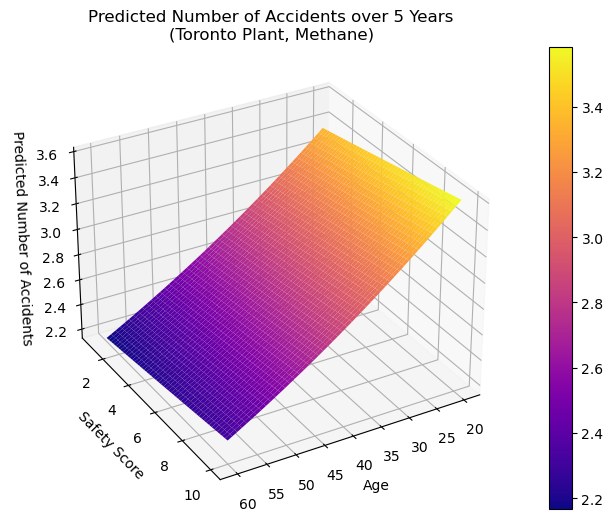

In [28]:
intercept = 0.5055
age_coef = -0.0111
safety_score_coef = 0.0077
time_in_factory_coef = 0.1842
factory_toronto_coef = 0  
chemical_methane_coef = 0

ages = np.linspace(20, 60, 50)  
safety_scores = np.linspace(1, 10, 50)  

ages, safety_scores = np.meshgrid(ages, safety_scores)
log_lambda = (
    intercept
    + age_coef * ages
    + safety_score_coef * safety_scores
    + time_in_factory_coef * 5  
    + factory_toronto_coef * 1  
    + chemical_methane_coef * 1  
)
lambda_values = np.exp(log_lambda)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(ages, safety_scores, lambda_values, cmap='plasma')

ax.set_xlabel('Age')
ax.set_ylabel('Safety Score')
ax.set_zlabel('Predicted Number of Accidents')
ax.set_title('Predicted Number of Accidents over 5 Years\n(Toronto Plant, Methane)')

fig.colorbar(surf)
ax.view_init(elev=30, azim=60)
plt.show()


<div dir="rtl">

### הגרף מאפשר לראות כיצד שינוי בגיל או בציון מבחן הבטיחות משפיע על מספר התאונות הצפוי במהלך 5 שנים,
### במפעל בטורונטו עבור החומר mathane 


# סעיף 11

<div dir="rtl">


### איך מוצאים את הפרמטרים

###   *רגרסיה ליניארית* מוצאים את הפרמטרים (המשתנים) על ידי חישוב פשוט שמנסה למזער את ההבדלים בין התחזיות לנתונים בפועל(שיטת הריבועים הפחותים).  
   
### *רגרסיה פואסונית* מוצאים את הפרמטרים על ידי שיטה חישובית מורכבת יותר(מקסימום הסבירות-למצוא את ערכי הפרמטרים שיגדילו את ההסתברות לקבל את הנתונים שנצפו), שמנסה להתאים את המודל למספרים בדידים (כמו ספירת תאונות)

 ### מתי כל שיטה עדיפה

###   *רגרסיה ליניארית* מתאימה יותר למקרים פשוטים שבהם המשתנה שאנו רוצים לחזות הוא רציף (כמו גובה או משקל)
   
###   *רגרסיה פואסונית* מתאימה למצבים שבהם המטרה היא לחזות מספרים קטנים וספציפיים (כמו מספר תאונות), אבל קשה יותר לחשב אותה

### יתרון הרגרסיה הליניארית

###    רגרסיה ליניארית קלה יותר לשימוש ומאפשרת למצוא את הפתרונות בצורה מהירה ופשוטה יותר, כשהמודל מתאים לתנאים של הנתונים.